In [1]:

import os
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Messinger
from Messinger import fem_velocidades  
import Messinger.Procesado_aerodinamico
from Messinger.Procesado_aerodinamico import Procesado_aerodinamico
from Messinger.Procesado_termico import procesado_termico
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pywt
import tkinter as tk


import numpy as np
import pandas as pd

from scipy.signal import find_peaks, peak_prominences
import scipy
from tkinter import filedialog
from tkinter import *
#%%
V_inf = int(70)
os.chdir('Messinger')
alpha=10

(Elementos,Velocidades,Superficie,Puntos)=Procesado_aerodinamico(70,10)
print(os.getcwd())
Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie,Puntos)
Modelo_termico = fem_velocidades.analisis_termico()
Modelo_termico.punto_remanso(Modelo)
print(Modelo_termico.x_remanso)


# In[23]:

df = pd.DataFrame(data =[[2.54,5,12.4,20.4,30.3,40.3,49,60],['A8','A7','A6','A5','A4','A3','A2','A1']])
df=df.T
df.columns = ['s(mm)','sensor']
print(df)
MVD=40
T_remanso=-5
LWC=0.9
V=int(70)
x_experimental=[0,0.01,0.02]
T_experimental=[0,0.0,0.0]
angulo_ataque =5
zona='intrados'
(Elementos,Velocidades,Superficie,Puntos)=Procesado_aerodinamico(70,angulo_ataque)
Superficie = Superficie[Superficie['y']>=0]
Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie,Puntos)

x_superficie=np.array(Superficie['x'])
y_superficie = np.array(Superficie['y'])
s_perfil = [0]
for i in range(1,len(Modelo.x_superficie)):
    
    delta_S= (Modelo.x_superficie[i]-Modelo.x_superficie[i-1])**2+(Modelo.y_superficie[i]-Modelo.y_superficie[i-1])**2
    s_perfil.append(np.sqrt(delta_S)+s_perfil[-1])
X=[] 
df['s(m)'] =df['s(mm)']*10**-3  
for s in df['s(m)']:    
    for i in range(1,len(s_perfil)):     
            if s>=s_perfil[i-1] and s<=s_perfil[i]:
                X.append(Modelo.x_superficie[i-1]+(Modelo.x_superficie[i]-Modelo.x_superficie[i-1])/(s_perfil[i]-s_perfil[i-1])*(s-s_perfil[i-1]))
                break


# In[17]:
df['x(m)']=X
print(df)


# In[28]:


X={}
for i in range(len(df['x(m)'])-1):
    n_sensor=int(df['sensor'].loc[i][-1])
    X.update({'FBG'+str(n_sensor):-df['x(m)'].loc[i+1]})
    n_sensor=int(df['sensor'].loc[i][-1])+8
    X.update({'FBG'+str(n_sensor):df['x(m)'].loc[i+1]})

print(X)

c:\Users\gonzalezvm\programa hielo\Messinger
-0.002003873387
  s(mm) sensor
0  2.54     A8
1     5     A7
2  12.4     A6
3  20.4     A5
4  30.3     A4
5  40.3     A3
6    49     A2
7    60     A1
  s(mm) sensor     s(m)      x(m)
0  2.54     A8  0.00254  0.000763
1     5     A7    0.005  0.002403
2  12.4     A6   0.0124  0.008875
3  20.4     A5   0.0204  0.016510
4  30.3     A4   0.0303  0.026211
5  40.3     A3   0.0403  0.036118
6    49     A2    0.049  0.044780
7    60     A1     0.06  0.055760
{'FBG8': -0.002403067215485018, 'FBG16': 0.002403067215485018, 'FBG7': -0.008875106836142116, 'FBG15': 0.008875106836142116, 'FBG6': -0.016510196715075517, 'FBG14': 0.016510196715075517, 'FBG5': -0.02621094848487953, 'FBG13': 0.02621094848487953, 'FBG4': -0.03611847338013922, 'FBG12': 0.03611847338013922, 'FBG3': -0.044780487828938204, 'FBG11': 0.044780487828938204, 'FBG2': -0.05576011471708383, 'FBG10': 0.05576011471708383}


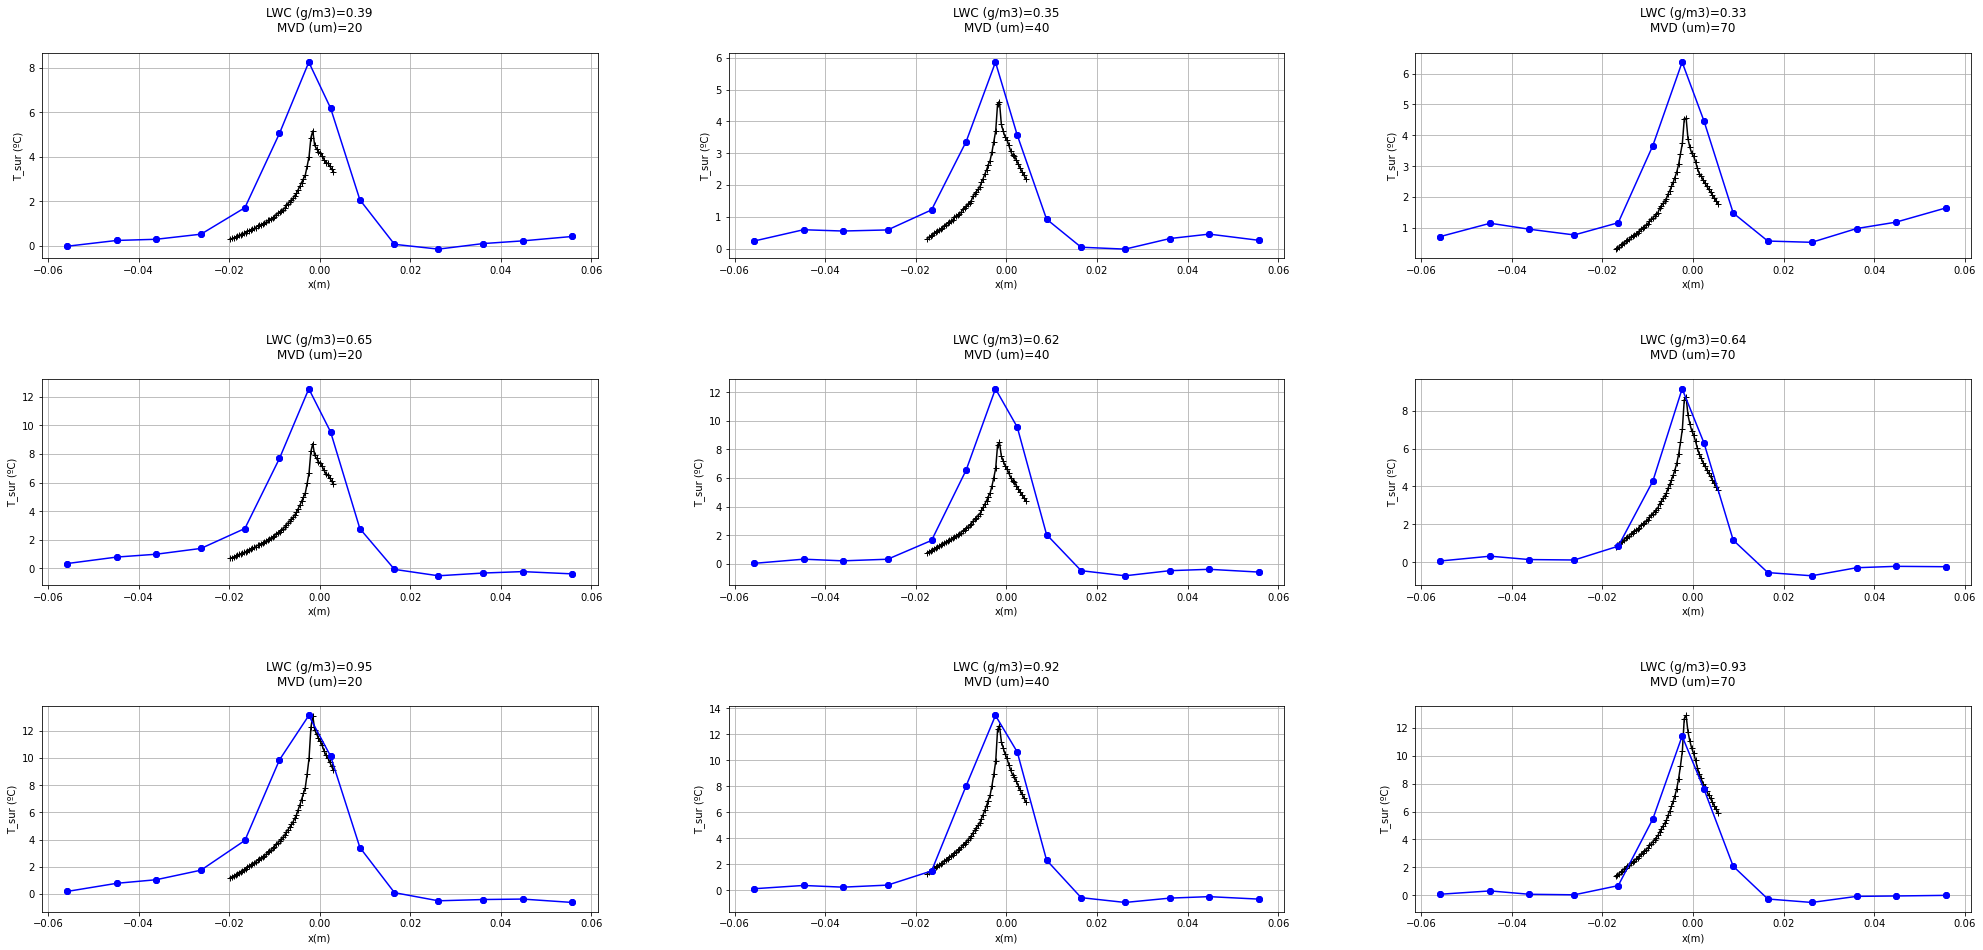

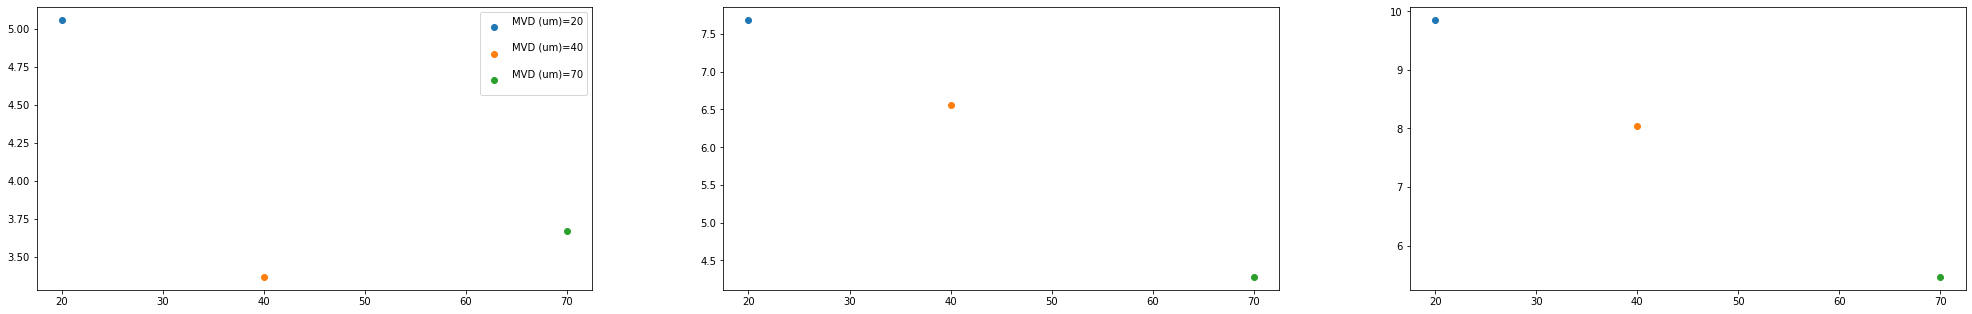

In [17]:
fig,ax = plt.subplots(nrows=3,ncols=3,figsize =(30,15))
fig.tight_layout(pad=10.0)
fig2,ax2 = plt.subplots(nrows=1,ncols=3,figsize =(30,7))
fig2.tight_layout(pad=10.0)
columna = 0
fila = 0
Datos_rime=[]
for mvD in ['4','5','6']:
    fila = 0
    for lwC in ['A','B','C']:
        
        nombre_archivo ='E://Ensayos_Rime_10//ensayo_'+mvD+lwC+'_RIME_10grados.txt'
        file = open(nombre_archivo,'r')
        lineas = file.readlines()
        file.close()
        LWC = lineas[1]
        for caracter in range(len(LWC)):
            if LWC[caracter]=='=':
                lwc = float(LWC[caracter+1:-1])
        MVD = lineas[2]
        for caracter in range(len(MVD)):
            if MVD[caracter]=='=':
                mvd = int(MVD[caracter+1:-1])
        df = pd.read_csv(nombre_archivo,header=3,sep='\t',index_col=False)
        if mvD+lwC=='6B':df['Tiempo (s)'] = df['Tiempo (s)']+20
        df = df[df['Tiempo (s)']<140]
        df.index =df['Tiempo (s)']
        x_experimental = [0,0.01,0.02,0.039]
        T_experimental = [-2.5, -3,-5.5,-5.5]
        LWC=lwc
        V=70
        ax[fila,columna].set_title(str(lineas[1])+ str(MVD))
        T_remanso=np.mean(df['FBG1'].loc[110:120])
        MVD = mvd
        alpha=10
        zona_estudio = 'extrados'
        (x_ext,T_sur_ext)=procesado_termico(alpha,LWC,T_remanso,MVD,zona_estudio,V)
        for iteracion,T in enumerate(T_sur_ext):
            
            if T <-200:T_sur_ext[iteracion]=np.nan
        
        for i in X:
            x = X[i]
            for j in range(len(x_ext)-1):
                if x>= x_ext[j] and x<= x_ext[j+1] and x>=0 and T_sur_ext[j]>=-200:
                    # ax[fila,columna].plot(x_ext[j],T_sur_ext[j],'ob')
                    # ax[fila,columna].text(x_ext[j],T_sur_ext[j],i)
                    Datos_rime.append([x_ext[j],T_sur_ext[j],i,mvd,lwc])
                    break


        zona_estudio = 'intrados'
        (x_int,T_sur_int)=procesado_termico(alpha,LWC,T_remanso,MVD,zona_estudio,V)
        for iteracion,T in enumerate(T_sur_int):
            
            if T <-200:T_sur_int[iteracion]=np.nan
        
        
        for i in X:
            x = X[i]
            for j in range(len(x_int)-1):
                if x<= x_int[j] and x>= x_int[j+1] and x<=0 and T_sur_int[j]>=-200:
                    # ax[fila,columna].plot(x_int[j],T_sur_int[j],'ob')
                    # ax[fila,columna].text(x_int[j],T_sur_int[j],i)
                    Datos_rime.append([x_int[j],T_sur_int[j],i,mvd,lwc])
                    break
        
        ax[fila,columna].plot(x_int,T_sur_int-T_remanso,'+-k',label='analitic')
        ax[fila,columna].plot(x_ext,T_sur_ext-T_remanso,'+-k',label='analitic')
        ax[fila,columna].set_xlabel('x(m)')
        ax[fila,columna].set_ylabel('T_sur (ºC)')
        ax[fila,columna].grid()
        
        Posiciones = []
        temperaturas =[]
        for sensor in X:
            try:
                temperaturas.append(float(np.mean(df[sensor].loc[110:120])))
            except:
                temperaturas.append(0)
            Posiciones.append(X[sensor])
            ax[fila,columna].plot([Posiciones[-1],Posiciones[-1]],[temperaturas[-1]-T_remanso,temperaturas[-1]-T_remanso],'ob')
        df_sensores = pd.DataFrame()
        df_sensores['x']=Posiciones
        df_sensores['T']=temperaturas-T_remanso
        df_sensores=df_sensores.sort_values(by=['x'])
        ax[fila,columna].plot(df_sensores['x'],df_sensores['T'],'b')
        if LWC>0.8:
            ax2[2].plot(MVD,float(np.mean(df['FBG7'].loc[110:120]))-T_remanso,'o',label=lineas[2])
        if LWC>0.6 and LWC<0.8:
            ax2[1].plot(MVD,float(np.mean(df['FBG7'].loc[110:120]))-T_remanso,'o',label=lineas[2])
        if LWC>0.3 and LWC<0.6:
            ax2[0].plot(MVD,float(np.mean(df['FBG7'].loc[110:120]))-T_remanso,'o',label=lineas[2])
            ax2[0].legend()
        fila = fila + 1
        
    ax[fila-1,columna].set_xlabel('x(m)')
    # plt.show()
    columna = columna + 1


In [3]:
def procesado_termico(angulo_ataque,LWC,T_remanso,MVD,zona,V):
   global pto_remanso 
   import __main__

   x_experimental=__main__.x_experimental
   
   betha=pickle.load(open('Eficiencias_coleccion//betha'+str(V)+'_'+str(angulo_ataque)+'_'+str(MVD)+'.p', "rb"))
   Modelo_termico = fem_velocidades.analisis_termico()
   Modelo_termico.calculo_S(Modelo)
   Modelo_termico.set_zona_perfil(zona)
   Modelo_termico.set_T_remanso(T_remanso+273.15)
   Modelo_termico.x_experimental = __main__.x_experimental
   Modelo_termico.T_experimental = __main__.T_experimental
   Modelo_termico.set_recovery_factor(1)
   Modelo_termico.set_presion_remanso(101325)
   Modelo_termico.set_LWC(LWC)

   Modelo_termico.set_diametro_caracteristico(0.02)
   Modelo_termico.set_velocidad_flujo(V)
   Modelo_termico.set_freezing_fraction(0.8)
   Modelo_termico.set_flujo_masico_entrada(0)
   Modelo_termico.set_T_superficie_anterior(273.15)
   Modelo_termico.set_cp_ws_anterior(1.004)
   Modelo_termico.set_T_superficie(273.15)
   Modelo_termico.set_local_collection_efficiency(0.5)
   Modelo_termico.set_freezing_fraction(1)
   Modelo_termico.set_tamano_gota(20e-6)
   Modelo_termico.V_e = Modelo_termico.V
   Modelo_termico.T_estatica = Modelo_termico.T_remanso -Modelo_termico.V**2/2/1004.5
   Modelo_termico.set_coeficiente_convectivo(400)
   Modelo_termico.calculo_todos_calores()
   Modelo_termico.Modelo_CFD = Modelo
   pto_remanso=Modelo_termico.x_remanso
   Modelo_termico.betha_nodos = betha
   h_l=[Modelo_termico.coeficiente_convectivo_laminar(Modelo_termico.longitud_equivalente(i)) for i in x_experimental]
#    h_l[0]=h_l[1]
   
   Modelo_termico.coeficiente_convectivo_valores = h_l
   (x,T_sur)=Modelo_termico.calculate_T_sur()
  
   return (np.array(x)+pto_remanso,T_sur)

In [15]:
mvD='4'
lwC='C'
nombre_archivo ='E://Ensayos_Rime_10//ensayo_'+mvD+lwC+'_RIME_10grados.txt'
zona_estudio = 'extrados'
Posiciones = []
temperaturas =[]

file = open(nombre_archivo,'r')
lineas = file.readlines()
file.close()
LWC = lineas[1]
for caracter in range(len(LWC)):
    if LWC[caracter]=='=':
        lwc = float(LWC[caracter+1:-1])
MVD = lineas[2]
for caracter in range(len(MVD)):
    if MVD[caracter]=='=':
        mvd = int(MVD[caracter+1:-1])
df = pd.read_csv(nombre_archivo,header=3,sep='\t',index_col=False)
if mvD+lwC=='6B':df['Tiempo (s)'] = df['Tiempo (s)']+20
df = df[df['Tiempo (s)']<140]
df.index =df['Tiempo (s)']
T_remanso=np.mean(df['FBG1'].loc[110:120])
for sensor in X:
    try:
        temperaturas.append(float(np.mean(df[sensor].loc[110:120])))
    except:
        temperaturas.append(np.nan)
    Posiciones.append(X[sensor])

In [5]:
(Elementos,Velocidades,Superficie,Puntos)=Procesado_aerodinamico(V,angulo_ataque)
Modelo = fem_velocidades.modelo_fem(Elementos,Velocidades,Superficie,Puntos)
Modelo.set_T_remanso(273.15+T_remanso)
Modelo.set_presion_remanso(1e5)
from sklearn.metrics import r2_score

In [18]:
for MVD in [20,30,40,50,60,70,80,90]:
    R = []
    for LWC in np.arange(0.1,1.2,0.05):
        (x_ext,T_sur_ext)=procesado_termico(alpha,LWC,T_remanso,MVD,zona_estudio,V)
        T_predict = []
        T_real=[]
        for i in range(len(Posiciones)):
            for j in range(len(x_ext)-1):
                if Posiciones[i]>=x_ext[j] and  Posiciones[i]<=x_ext[j+1]:
                    if str(T_sur_ext[j])!='nan':
                        T_predict.append(T_sur_ext[j])
                        T_real.append(temperaturas[i])
        (x_ext,T_sur_ext)=procesado_termico(alpha,LWC,T_remanso,MVD,'intrados',V)
        for i in range(len(Posiciones)):
            for j in range(len(x_ext)-1):
                if Posiciones[i]>=x_ext[j] and  Posiciones[i]<=x_ext[j+1]:
                    if str(T_sur_ext[j])!='nan':
                        T_predict.append(T_sur_ext[j])
                        T_real.append(temperaturas[i])            
        try:
            R.append(r2_score(T_real,T_predict))
            if R[-1]<0:R[-1]=0
        except:R.append(np.nan)
    plt.plot(np.arange(0.1,1.2,0.1),R,label=f'{MVD}$\mu m$')
plt.xlabel(f'LWC($g/m^{3}$)')
plt.ylabel('R')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (11,) and (22,)

9
0
1
2
3
4
5
6
9
0
1
2
3
4
5
6
9
0
1
2
3
4
5
6
9
0
1
2
3
4
5
6
9
0
1
2
3
4
5
6
9
0
1
2
3
4
5
6
9
0
1
2
3
4
5
6
9
0
1
2
3
4
5
6
9
0
1
2
3
4
5
6


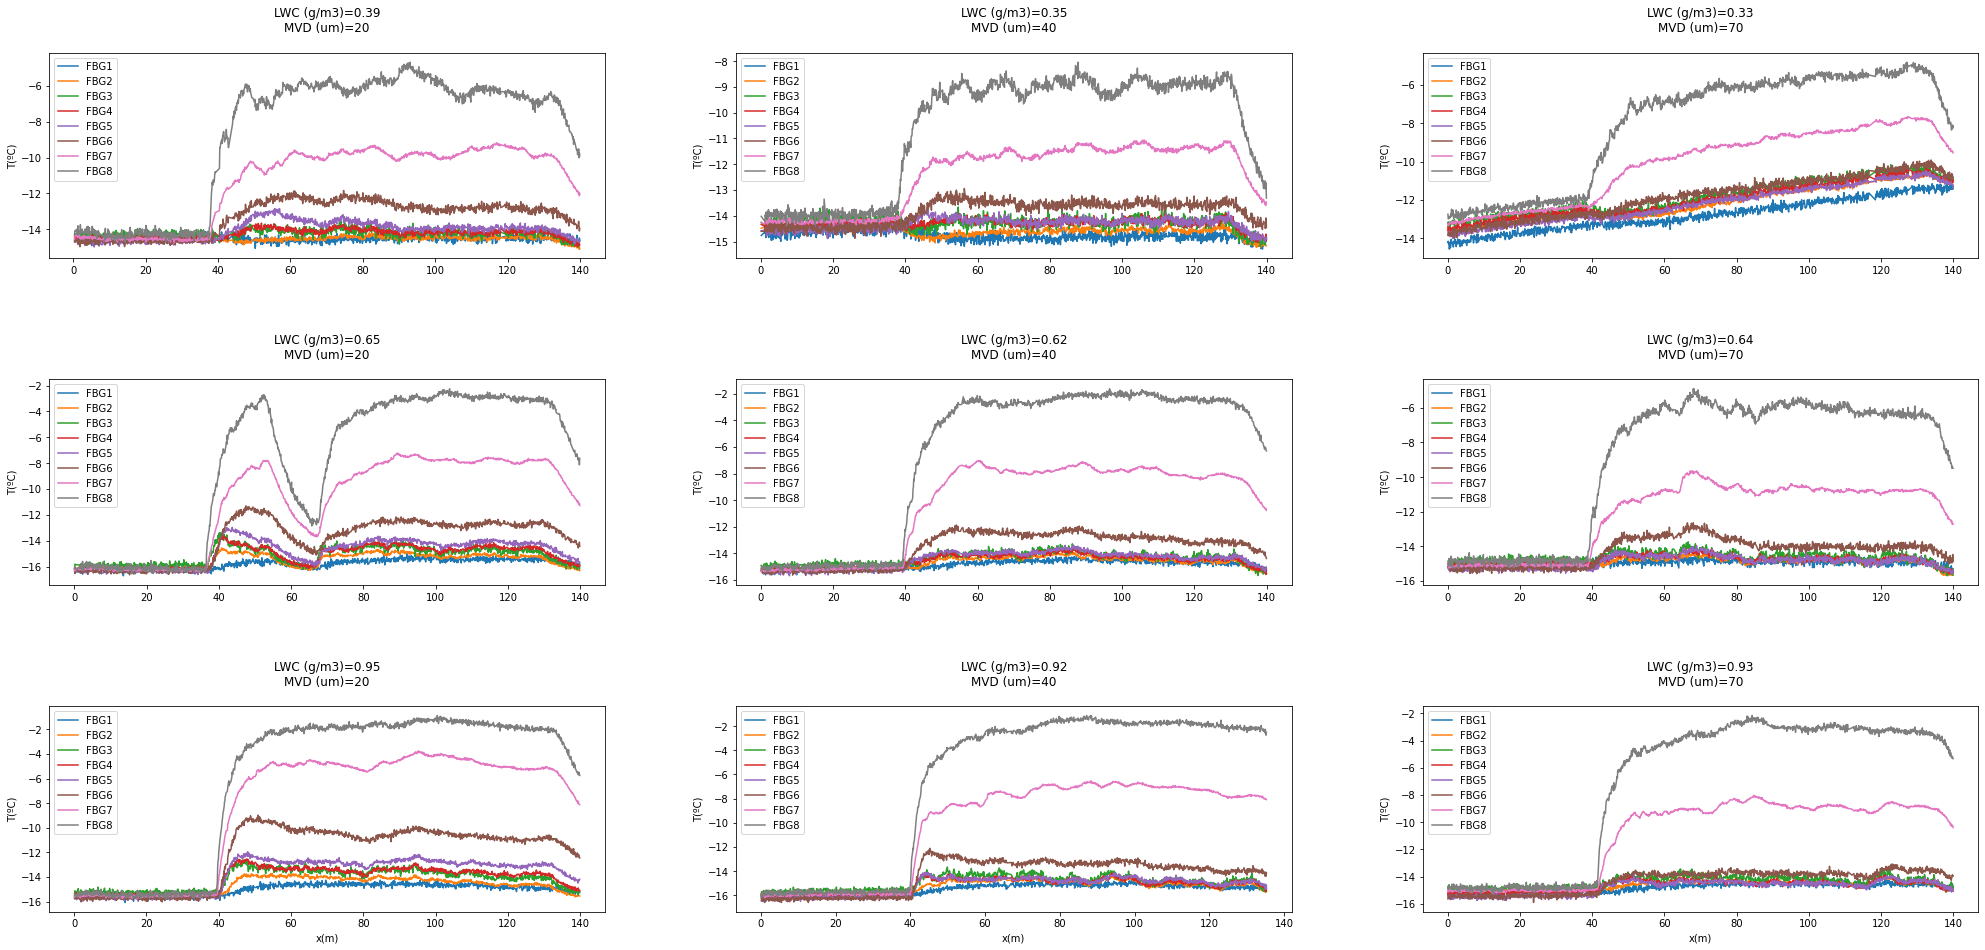

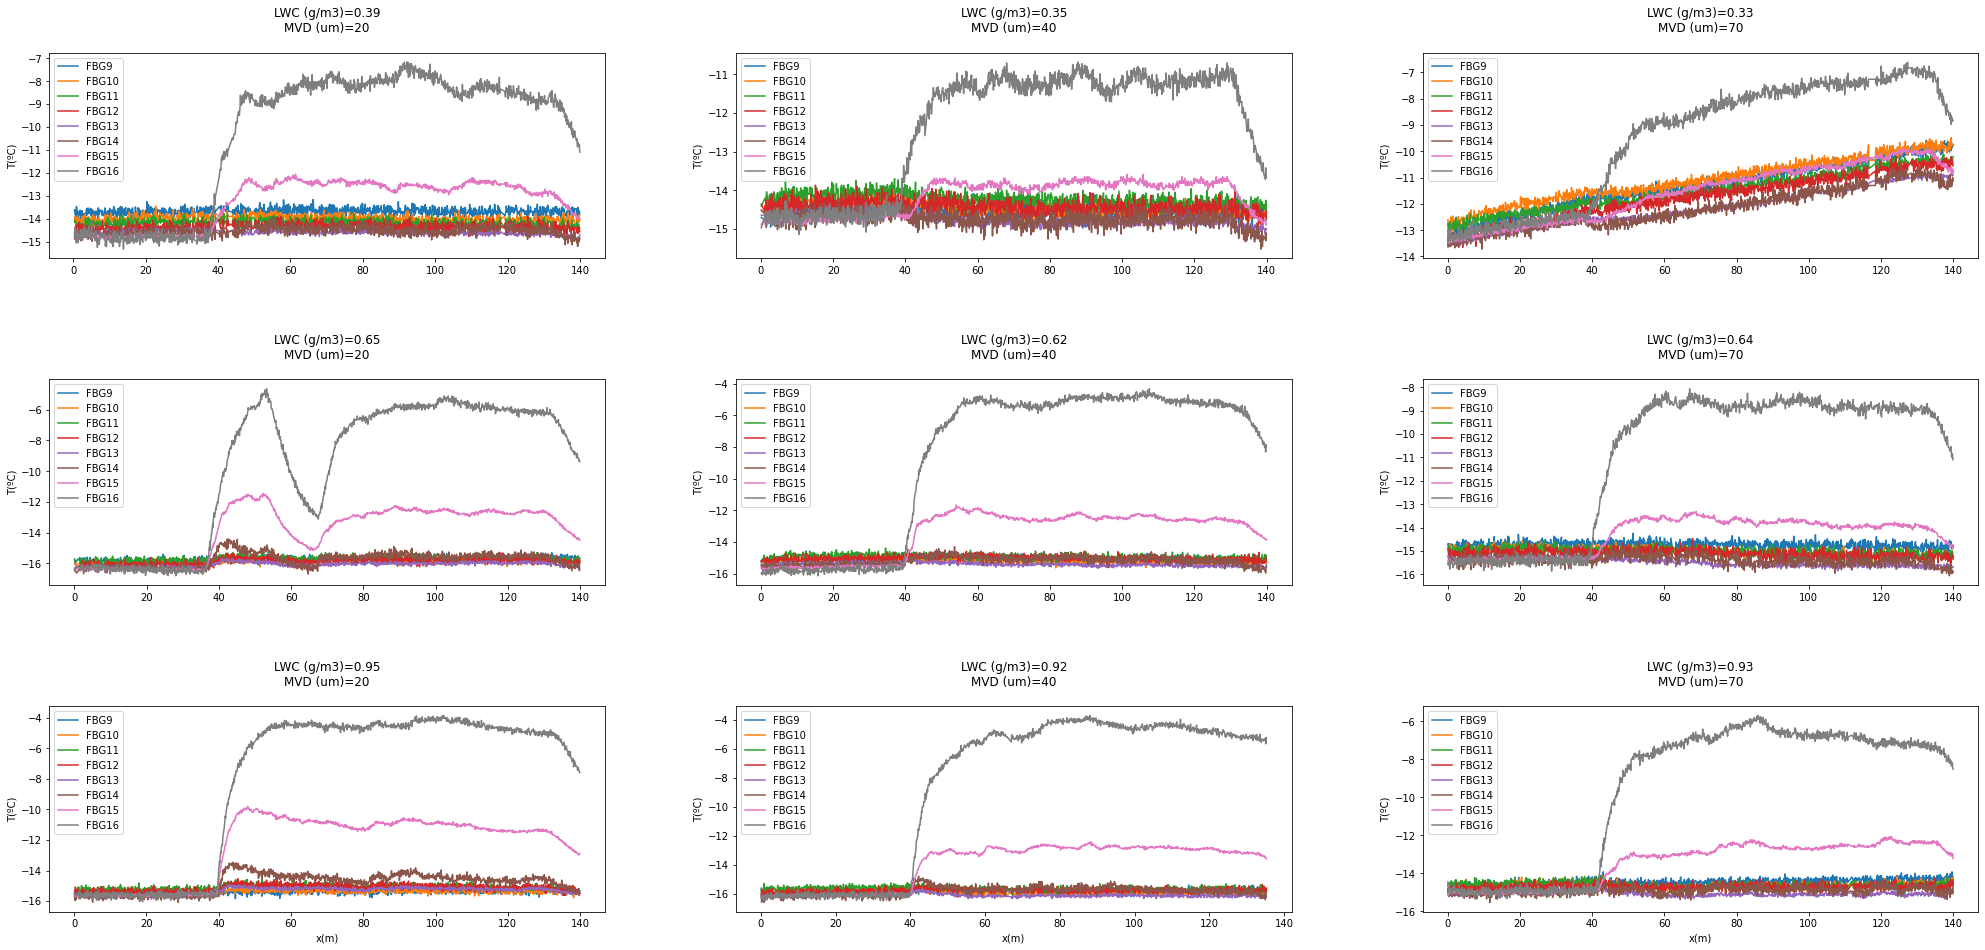

In [2]:
fig,ax = plt.subplots(nrows=3,ncols=3,figsize =(30,15))
fig.tight_layout(pad=10.0)
fig2,ax2 = plt.subplots(nrows=3,ncols=3,figsize =(30,15))
fig2.tight_layout(pad=10.0)
columna = 0
fila = 0
Datos_rime=[]
for mvD in ['4','5','6']:
    fila = 0
    for lwC in ['A','B','C']:
        nombre_archivo ='E://Ensayos_Rime_10//ensayo_'+mvD+lwC+'_RIME_10grados.txt'
        file = open(nombre_archivo,'r')
        lineas = file.readlines()
        file.close()
        LWC = lineas[1]
        for caracter in range(len(LWC)):
            if LWC[caracter]=='=':
                lwc = float(LWC[caracter+1:-1])
        MVD = lineas[2]
        for caracter in range(len(MVD)):
            if MVD[caracter]=='=':
                mvd = int(MVD[caracter+1:-1])
        df = pd.read_csv(nombre_archivo,header=3,sep='\t',index_col=False)
        df = df[df['Tiempo (s)']<140]
        df.index =df['Tiempo (s)']
        df = df.drop(columns=['Tiempo (s)'])
        zona = 'extrados'
        for column in df.columns:
            if column=='FBG9':zona = 'intrados'
            if zona == 'intrados':
                ax2[fila,columna].plot(df.index,df[column],label=column)
                ax2[fila,columna].set_title(lineas[1]+lineas[2])
                ax2[fila,columna].set_ylabel('T(ºC)')
            else:
                ax[fila,columna].plot(df.index,df[column],label=column)
                ax[fila,columna].set_title(lineas[1]+lineas[2])
                ax[fila,columna].set_ylabel('T(ºC)')
                
        ax2[fila,columna].legend()
        ax[fila,columna].legend()
        fila+=1
        
    ax[fila-1,columna].set_xlabel('x(m)')
    ax2[fila-1,columna].set_xlabel('x(m)')
    columna = columna + 1
fig.savefig('rime_10_grados.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


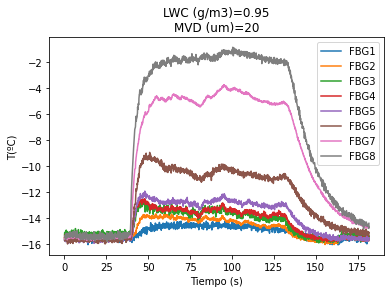

In [9]:
nombre_archivo ='E://Ensayos_Rime_10//ensayo_'+'4'+'C'+'_RIME_10grados.txt'
file = open(nombre_archivo,'r')
lineas = file.readlines()
file.close()
LWC = lineas[1]
MVD = lineas[2]
df = pd.read_csv(nombre_archivo,header=3,sep='\t',index_col=False)
df = df[df['Tiempo (s)']<190]
df.index =df['Tiempo (s)']
df = df.drop(columns=['Tiempo (s)'])
for i in range(9,17):df = df.drop(columns=['FBG'+str(i)])
df.plot()
plt.ylabel('T(ºC)')
plt.title(LWC+MVD[:-1])
plt.savefig('4C.eps')